dropar colunas unnamed, vacanciaFisica, vacanciaFinanceira, 
tratar R$, % E ,
tratar outliers AC03

In [68]:
import pandas as pd
import missingno as msno

In [69]:
dados = pd.read_csv('../basesOriginais/reits.csv')

In [70]:
dados.head()

,Unnamed: 0,codigo,setor,precoAtual,liquidezDiaria,dividendo,dividendYield,dividendYieldAnual,variacaoPreco,pvp,vacanciaFisica,vacanciaFinanceira
0,0,AAZQ11,NaN,"R$ 9,64",55865.0,"R$ 0,13","1,35%","2,90%","-0,72%","1,00",NaN,NaN
1,1,ABCP11,Shoppings,"R$ 64,85",798.0,"R$ 0,50","0,77%","1,53%","-2,90%","0,71","7,50%",NaN
2,2,AFHI11,Títulos e Val. Mob.,"R$ 92,21",7009.0,"R$ 1,06","1,12%","2,24%","0,57%","0,97",NaN,NaN
3,3,AGRX11,NaN,"R$ 10,69",10183.0,"R$ 0,18","1,68%","3,24%","4,29%",NaN,NaN,NaN
4,4,AIEC11,Lajes Corporativas,"R$ 60,64",3907.0,"R$ 0,75","1,22%","1,49%","-7,46%","0,64","0,00%",NaN


In [71]:
dados.columns

Index(['Unnamed: 0', 'codigo', 'setor', 'precoAtual', 'liquidezDiaria',
       'dividendo', 'dividendYield', 'dividendYieldAnual', 'variacaoPreco',
       'pvp', 'vacanciaFisica', 'vacanciaFinanceira'],
      dtype='object')

# Tratamento de index e duplicados.

In [72]:
dados.shape

(328, 12)

In [73]:
dados = dados.reset_index(drop=True).drop_duplicates()
dados.shape

(328, 12)

# Tratamento de colunas desnecessárias

In [74]:
dados.drop(['Unnamed: 0', 'vacanciaFisica', 'vacanciaFinanceira'],axis=1, inplace=True)

#Tratamento de dados para retirar os caracteres especiais

In [75]:
alteredColumns = ['precoAtual', 'dividendo', 'dividendYield','dividendYieldAnual', 'variacaoPreco', 'pvp']
for column in alteredColumns:
    dados[column] = dados[column].apply(lambda item: item if pd.isna(item) else float(item.replace('R$ ','').replace('.','').replace(',','.').replace('%','')))
    

In [76]:
dados.head()

,codigo,setor,precoAtual,liquidezDiaria,dividendo,dividendYield,dividendYieldAnual,variacaoPreco,pvp
0,AAZQ11,NaN,9.64,55865.0,0.13,1.35,2.90,-0.72,1.00
1,ABCP11,Shoppings,64.85,798.0,0.50,0.77,1.53,-2.90,0.71
2,AFHI11,Títulos e Val. Mob.,92.21,7009.0,1.06,1.12,2.24,0.57,0.97
3,AGRX11,NaN,10.69,10183.0,0.18,1.68,3.24,4.29,NaN
4,AIEC11,Lajes Corporativas,60.64,3907.0,0.75,1.22,1.49,-7.46,0.64


# Tratamento de dados missing

In [77]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   codigo              328 non-null    object 
 1   setor               309 non-null    object 
 2   precoAtual          319 non-null    float64
 3   liquidezDiaria      319 non-null    float64
 4   dividendo           328 non-null    float64
 5   dividendYield       323 non-null    float64
 6   dividendYieldAnual  291 non-null    float64
 7   variacaoPreco       323 non-null    float64
 8   pvp                 300 non-null    float64
dtypes: float64(7), object(2)
memory usage: 25.6+ KB


In [78]:
print('Valoress NULL Da Base De Dados:\n')
print(dados.isnull().sum())

Valoress NULL Da Base De Dados:

codigo                 0
setor                 19
precoAtual             9
liquidezDiaria         9
dividendo              0
dividendYield          5
dividendYieldAnual    37
variacaoPreco          5
pvp                   28
dtype: int64


In [79]:
print('\nValoress NAN Da Base De Dados:\n')
print(dados.isna().sum())


Valoress NAN Da Base De Dados:

codigo                 0
setor                 19
precoAtual             9
liquidezDiaria         9
dividendo              0
dividendYield          5
dividendYieldAnual    37
variacaoPreco          5
pvp                   28
dtype: int64


<Axes: >

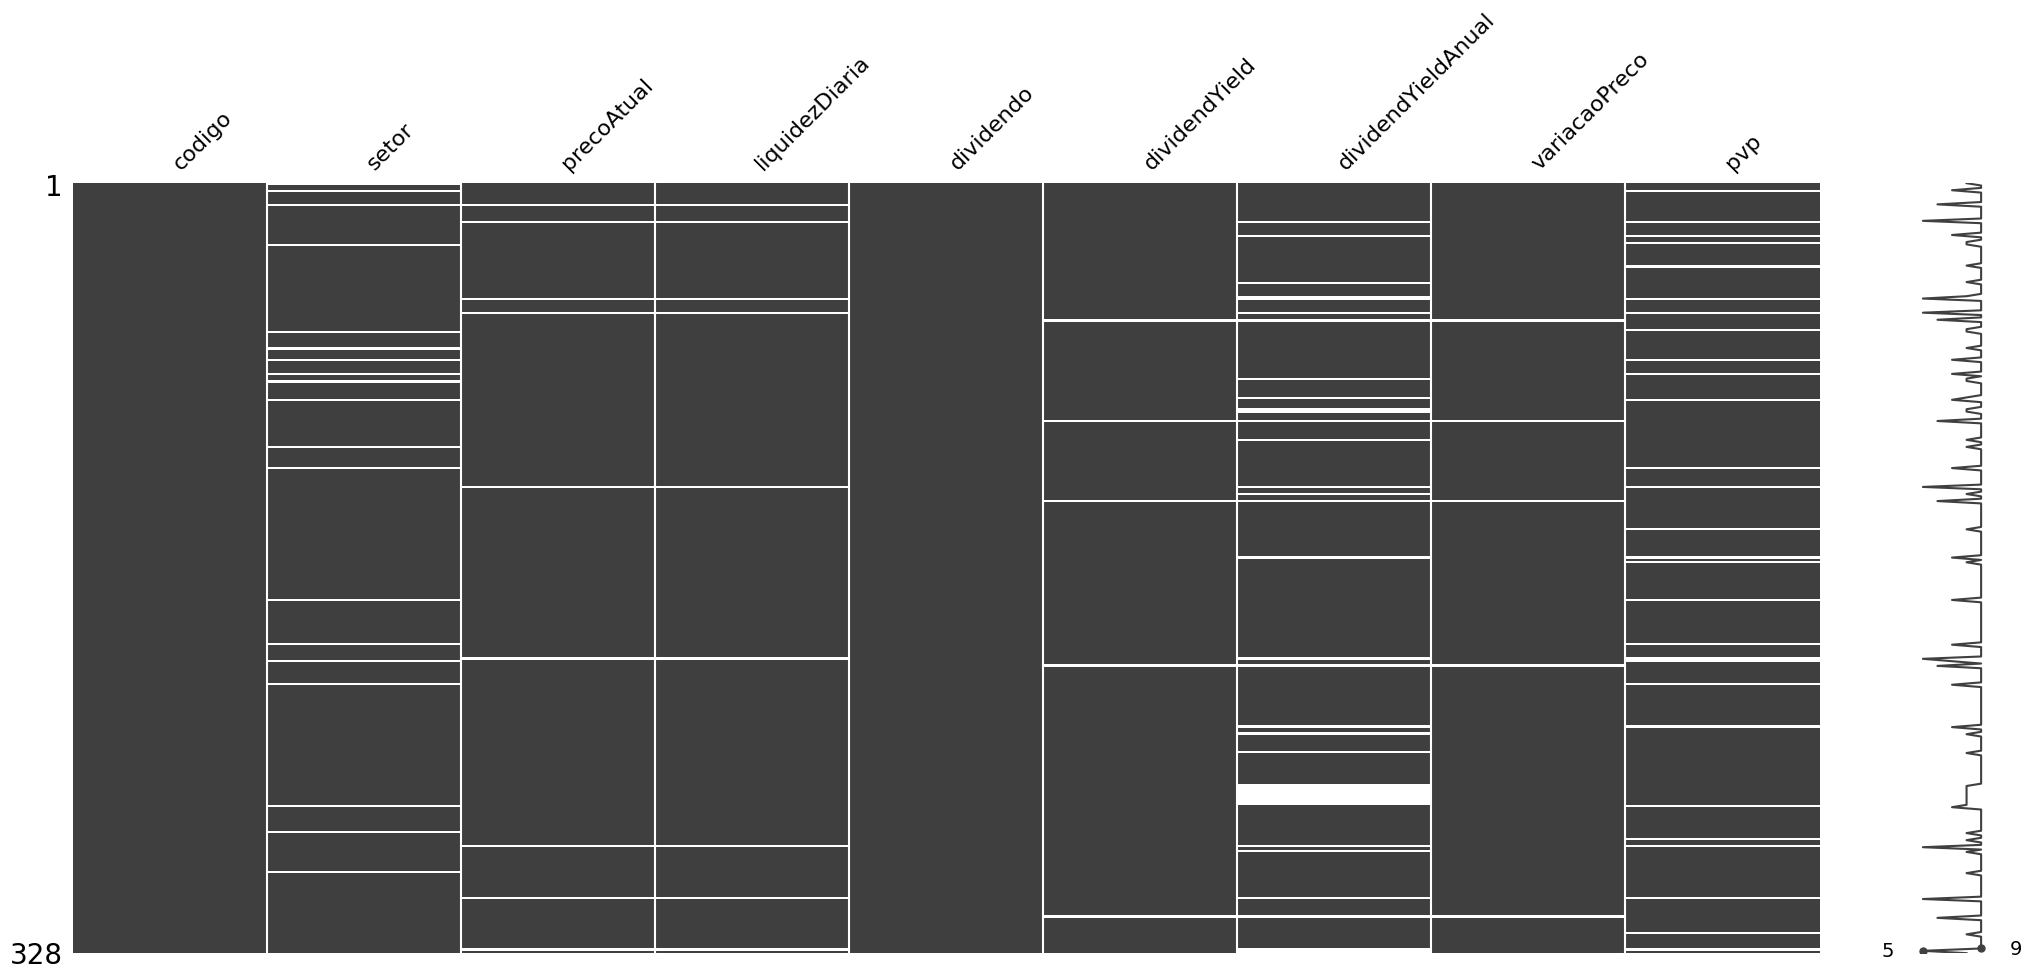

In [80]:
msno.matrix(dados)

In [81]:
nullData = dados.isnull().sum()

# percorra os dados nullData e pegue os dados que sao maiores que 0: se for string coloque o valor 'Nao informado', se for float coloque o valor 0.0
for column in nullData.index:
    if nullData[column] > 0:
        if dados[column].dtype == 'object':
            dados[column] = dados[column].fillna('Nao informado')
        else:
            dados[column] = dados[column].fillna(0.0)

<Axes: >

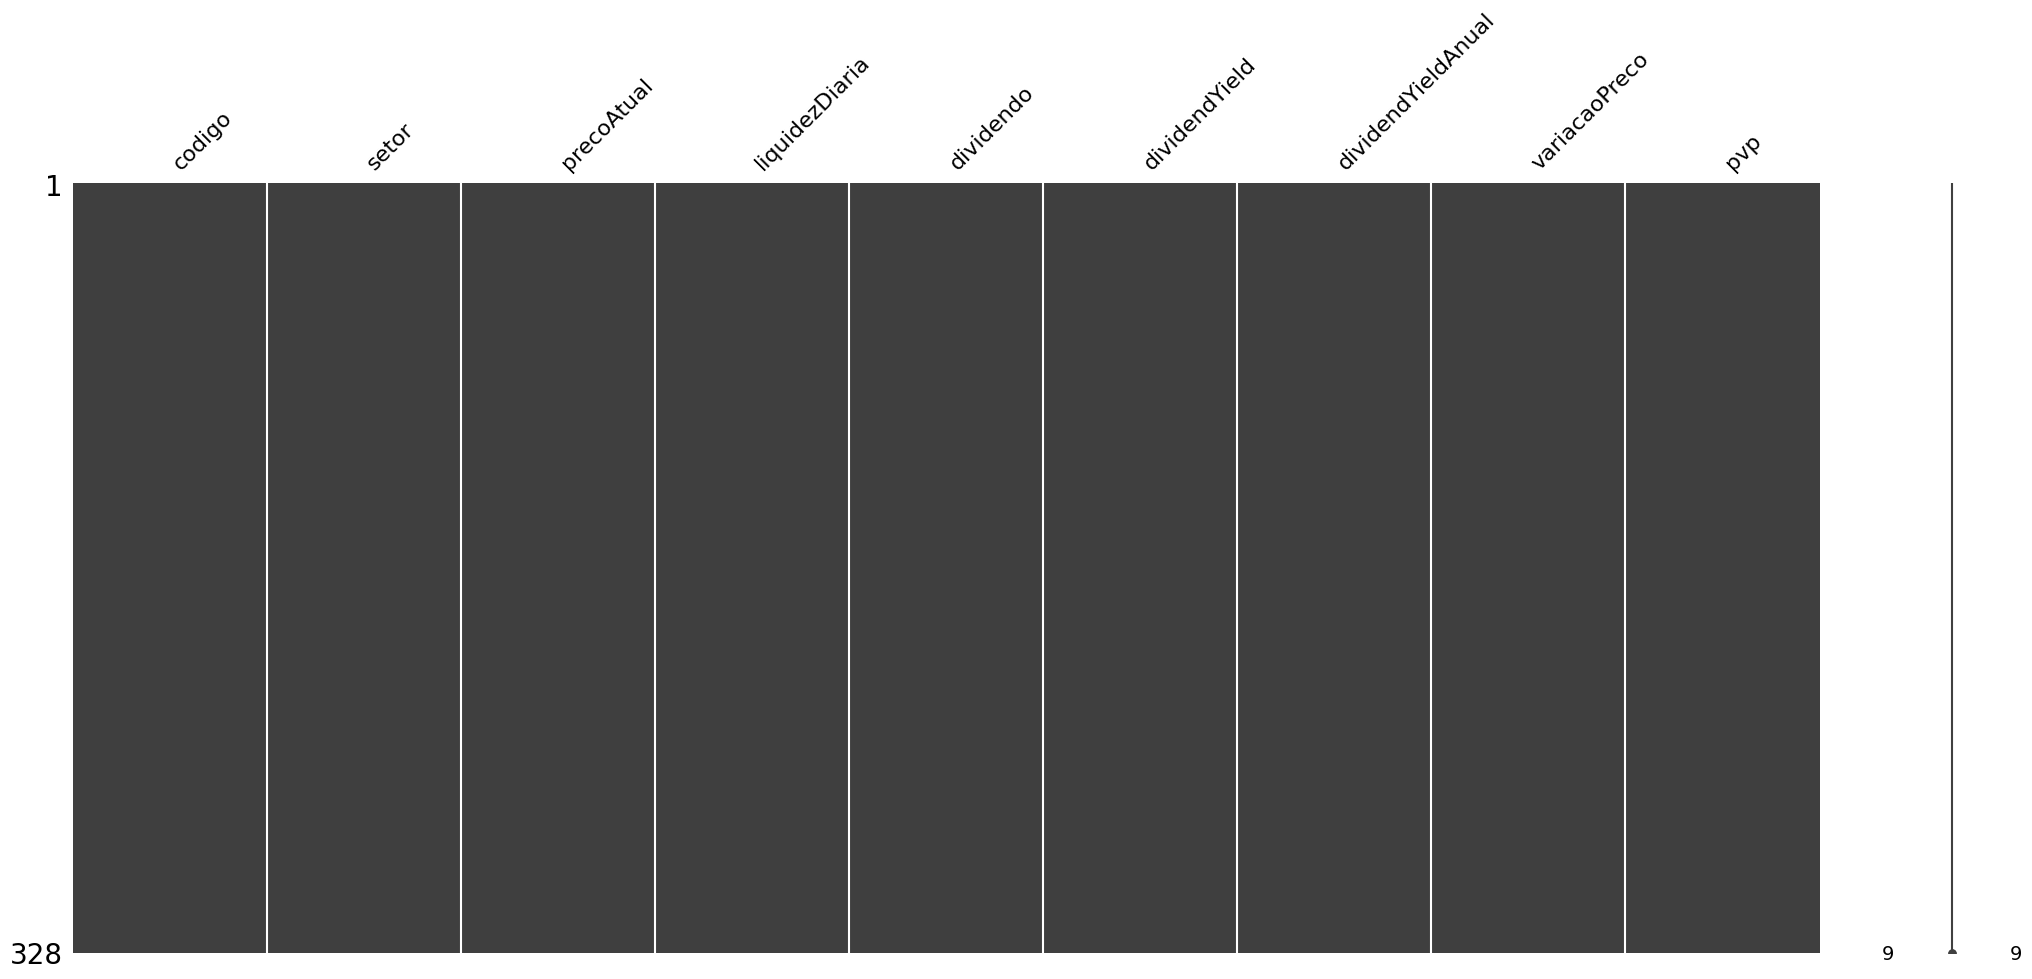

In [82]:
msno.matrix(dados)

In [83]:
# Calcula os Outliers Da Base de Dados, Caso Exista.

for column in alteredColumns:

  describe = dados[column].describe()

  q1 = describe["25%"]
  q3 = describe["75%"]
  iqr = q3 - q1

  inferior = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr

  # Exibe os Limites De Outliers por Coluna.
  
  print(f'Limites Da Coluna {column}:')
  print(f"-Limite inferior: {inferior:.2f}")
  print(f"-Limite superior: {upper:.2f}")
  print()

Limites Da Coluna precoAtual:
-Limite inferior: -46.12
-Limite superior: 180.66

Limites Da Coluna dividendo:
-Limite inferior: -0.46
-Limite superior: 1.89

Limites Da Coluna dividendYield:
-Limite inferior: -0.11
-Limite superior: 1.86

Limites Da Coluna dividendYieldAnual:
-Limite inferior: -0.33
-Limite superior: 3.88

Limites Da Coluna variacaoPreco:
-Limite inferior: -6.92
-Limite superior: 4.64

Limites Da Coluna pvp:
-Limite inferior: 0.04
-Limite superior: 1.45

